In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 917.2 kB/s eta 0:00:00:--:--
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=d91123f603d9a7f9861ebaa125b60f4a73b4e564c6d81856254242b961ac0cbb
  Stored in directory: /Users/shaistasyeda/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3507 sha256=1c8895817694ad09d7b9c0a7fa7727df6a6cd3c2757e87f9112fe6d61efe0617
  Stored in directory: /Users/shaistasyeda/Library/Caches/pip/wheels/9d/ff/2f/afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
Note: you may need to restart the kernel to use updated packages.


# Word2Vec

In [4]:
import pandas as pd

from nltk.tokenize import word_tokenize
from gensim.models import FastText

In [1]:
from gensim.models import Word2Vec
import os

# the directory path of tokenized files
data_directory = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates'

# Initialize an empty list to store sentences
sentences = []
print("here")

# Iterate through each file in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_directory, filename)
        print(f"Processing file: {file_path}")

        # Read the tokenized data from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            file_sentences = [line.split() for line in file]

        # Add the sentences from this file to the overall list
        sentences.extend(file_sentences)
        
        print(f"Processed {len(file_sentences)} sentences from {file_path}")

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model.bin')

print("Word2Vec Model training completed")

here
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt
Processed 471034 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1901_1950_tokenized.txt
Processed 765422 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1901_1950_tokenized.txt
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1851_1900_tokenized.txt
Processed 687819 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1851_1900_tokenized.txt
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1971_1990_tokenized.txt
Processed 1025994 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1971_1990_tokenized.txt
Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1991_2006_tokenized.txt
Processed 597305 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_d

In [3]:
from gensim.models import Word2Vec

# Load the saved Word2Vec model
model = Word2Vec.load('word2vec_model.bin')


In [3]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('men', 0.5933540463447571), ('female', 0.58524489402771), ('sex', 0.5548138618469238), ('wife', 0.5384922623634338), ('girl', 0.5375543236732483)]


In [6]:
# Find words similar to the word women
similar_words = model.wv.most_similar('women', topn=5)
print(f"Similar words to 'women': {similar_words}")

KeyError: "Key 'women' not present in vocabulary"

In [4]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=15)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('men', 0.5933540463447571), ('female', 0.58524489402771), ('sex', 0.5548138618469238), ('wife', 0.5384922623634338), ('girl', 0.5375543236732483), ('unmarried', 0.5127474665641785), ('bisexual', 0.5066877007484436), ('inspectorinspectorsergeantconstabletotal', 0.5064346194267273), ('ranksavon', 0.484653502702713), ('mother', 0.47149765491485596), ('lesbian', 0.45528358221054077), ('sexual', 0.45225992798805237), ('adult', 0.44631966948509216), ('rankstotal', 0.44467100501060486), ('male', 0.44349783658981323)]


In [5]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.6600674986839294), ('someone', 0.5912762880325317), ('husband', 0.5009009838104248), ('person', 0.4972824454307556), ('wife', 0.49441832304000854)]


In [21]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=15)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.6600674986839294), ('someone', 0.5912762880325317), ('husband', 0.5009009838104248), ('person', 0.4972824454307556), ('wife', 0.49441832304000854), ('father', 0.4914131760597229), ('lad', 0.48043251037597656), ('somebody', 0.4727700650691986), ('people', 0.4538191556930542), ('chap', 0.4463156461715698), ('policeman', 0.44304999709129333), ('son', 0.4408462345600128), ('englishman', 0.4390304684638977), ('woman', 0.43529239296913147), ('fellow', 0.42490649223327637)]


In [24]:
model = Word2Vec.load('word2vec_model.bin')

In [25]:
# Find words similar to the word suffrage
similar_words = model.wv.most_similar('suffrage', topn=15)
print(f"Similar words to 'suffrage': {similar_words}")

Similar words to 'suffrage': [('franchise', 0.696742594242096), ('enfranchisement', 0.45555379986763), ('disfranchisement', 0.4372865557670593), ('voter', 0.3991124927997589), ('elective', 0.39418527483940125), ('elector', 0.38717013597488403), ('voting', 0.383173406124115), ('electorate', 0.3795275390148163), ('ballot', 0.37519317865371704), ('democratic', 0.37162959575653076), ('electoral', 0.37135225534439087), ('enfranchising', 0.3685806393623352), ('democracy', 0.35439103841781616), ('enfranchised', 0.3541511297225952), ('universal', 0.3528963327407837)]


In [26]:
similar_words = model.wv.most_similar('equality', topn=15)
print(f"Similar words to 'equality': {similar_words}")

Similar words to 'equality': [('equal', 0.680004894733429), ('discrimination', 0.5354317426681519), ('parity', 0.4712681770324707), ('racial', 0.4699332118034363), ('gender', 0.4354051649570465), ('inequality', 0.4241330623626709), ('sex', 0.4130224585533142), ('equalityasked', 0.4092582166194916), ('footing', 0.3956541419029236), ('toleration', 0.3927280008792877), ('race', 0.3723876178264618), ('fairness', 0.3709823191165924), ('discriminated', 0.35953977704048157), ('diversity', 0.35619059205055237), ('differentiation', 0.3544129729270935)]


In [7]:
#the vector representation of the word woman
vector = model.wv['woman']
print(f"Vector representation of 'woman': {vector}")

Vector representation of 'woman': [ 2.3564      3.753244   -0.41304144  6.244112    1.8507706   3.714436
 -1.8692195   4.238472    1.4238366  -2.0187404  -3.2061436  -0.24064855
  0.02811576 -4.186275    0.8700946   1.151019    1.4331686  -0.30517128
  5.8615856   1.8697482   1.3613605  -4.4436474  -0.5636993  -3.880515
  0.8894953   0.3649068   0.09802148 -0.93517095  4.601683   -0.02369897
  0.60239774  1.0861696  -0.16868971  0.1900983  -3.9240632  -2.173769
  0.9053637   0.08313857  4.0664454   4.8482037   0.22638184  0.49103066
 -0.08679341 -2.514798    2.0976393  -3.2160828   2.7779095   2.8058639
  2.4393306  -0.74029464 -2.4814892   1.3102283   1.3731905   0.6360431
 -7.1056166  -2.0939715   0.49667063 -2.2025764   0.9198766  -2.8030362
 -0.89481515  5.537762    2.8655074   4.8633866  -0.18163304  0.08982263
  1.8840882  -1.7859993  -3.1925774  -1.3498391   2.1551225  -0.7668172
  0.883345   -1.8156962   2.731256    4.006288    1.1115992  -2.3946779
  2.2193987   0.25998405 -0.

In [8]:
#word analogy
analogy_result = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('queen', 0.47559547424316406)]


In [27]:
#word analogy
analogy_result = model.wv.most_similar(positive=['father', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('mother', 0.5810819864273071)]


In [28]:
#word analogy
analogy_result = model.wv.most_similar(positive=['gentleman', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('friend', 0.5325562357902527)]


In [29]:
#word analogy
analogy_result = model.wv.most_similar(positive=['loyal', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('dutiful', 0.38651522994041443)]


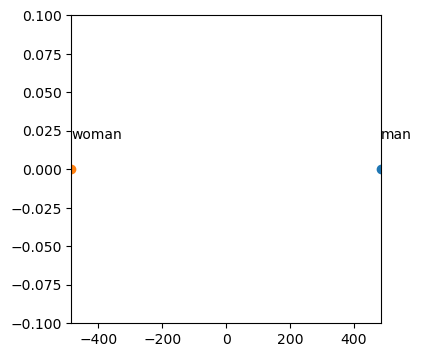

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Visualize embeddings of 'man' and 'woman'
words_to_visualize = ['man', 'woman']
vectors_to_visualize = np.array([model.wv[word] for word in words_to_visualize])

# Check the number of samples
n_samples, n_features = vectors_to_visualize.shape

# Ensuring perplexity is less than the number of samples
perplexity = min(3, n_samples - 1)

tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
vectors_2d = tsne.fit_transform(vectors_to_visualize)

plt.figure(figsize=(4, 4))
plt.xlim(vectors_2d[:, 0].min() - 0.1, vectors_2d[:, 0].max() + 0.1)
plt.ylim(vectors_2d[:, 1].min() - 0.1, vectors_2d[:, 1].max() + 0.1)

for i, word in enumerate(words_to_visualize):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.text(vectors_2d[i, 0] + 0.02, vectors_2d[i, 1] + 0.02, word)

plt.show()


# FastText

In [1]:
import fasttext
import os

# the directory path of tokenized files
data_directory = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates'

# Initialize an empty list to store sentences
sentences = []
print("here")

# Iterate through each file in the directory
for filename in os.listdir(data_directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_directory, filename)
        print(f"Processing file: {file_path}")

        # Read the tokenized data from the file
        with open(file_path, 'r', encoding='utf-8') as file:
            file_sentences = [line.split() for line in file]

        # Add the sentences from this file to the overall list
        sentences.extend(file_sentences)
        
        print(f"Processed {len(file_sentences)} sentences from {file_path}")

here


NotADirectoryError: [Errno 20] Not a directory: '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt'

In [ ]:
# Print statement for indicating the start of training
print("Training FastText model...")

# Train FastText model
model = fasttext.train_unsupervised(sentences, model='skipgram', dim=300, ws=15, minCount=5, thread=4)

# Print statement for the completion of training
print("FastText model trained successfully.")

# Save the trained model
model.save_model('fasttext_model.bin')

Training FastText model...


In [4]:
import fasttext

# the path to the tokenized file
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]

# Print statement for indicating the start of training
print("Training FastText model...")

# Train FastText model
model = fasttext.train_unsupervised(sentences, model='skipgram',dim=100, ws=5, minCount=1, thread=4)

# Save the trained model
model.save_model('fasttext_model.bin')


# Print statement for indicating the completion of training
print("FastText model trained successfully.")


Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt
Training FastText model...


# Word2Vec for the year 1800-1850

In [3]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_1.bin')

print("Word2Vec Model training completed")

Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt
Processed 471034 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1800_1850_tokenized.txt
Word2Vec Model training completed


In [4]:
from gensim.models import Word2Vec

# Load the saved Word2Vec model
model = Word2Vec.load('word2vec_model_1.bin')

In [5]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('wife', 0.6032223105430603), ('female', 0.5838871002197266), ('girl', 0.5633318424224854), ('husband', 0.552932858467102), ('seducer', 0.5423462986946106)]


In [6]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.5075037479400635), ('hypocrite', 0.4152478277683258), ('creature', 0.4150362014770508), ('upright', 0.3986075222492218), ('falshoods', 0.3948286473751068)]


# Word2Vec for the year 1851-1900

In [8]:
from gensim.models import Word2Vec
import os

# the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1851_1900_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_2.bin')

print("Word2Vec Model training completed")

Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1851_1900_tokenized.txt
Processed 687819 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1851_1900_tokenized.txt
Word2Vec Model training completed


In [9]:
# Load the saved Word2Vec model
model = Word2Vec.load('word2vec_model_2.bin')

In [10]:
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")

Similar words to 'woman': [('sex', 0.6303134560585022), ('female', 0.5213927626609802), ('wife', 0.5095798373222351), ('girl', 0.46941661834716797), ('unmarried', 0.45637622475624084)]


In [11]:
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Similar words to 'man': [('men', 0.6013084650039673), ('person', 0.5034669041633606), ('fool', 0.4483599066734314), ('policeman', 0.44412925839424133), ('neighbour', 0.43825453519821167)]


# Word2Vec for the year 1901-1950

In [12]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1901_1950_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_3.bin')

print("Word2Vec Model training completed")
# Load the saved Word2Vec model
model = model = Word2Vec.load('word2vec_model_3.bin')
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")


Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1901_1950_tokenized.txt
Processed 765422 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1901_1950_tokenized.txt
Word2Vec Model training completed
Similar words to 'woman': [('unmarried', 0.5150774121284485), ('men', 0.4896622896194458), ('sex', 0.4873221218585968), ('wife', 0.48091354966163635), ('adult', 0.48029235005378723)]
Similar words to 'man': [('men', 0.5892910361289978), ('husband', 0.48411449790000916), ('person', 0.43265873193740845), ('kicked', 0.4302557706832886), ('son', 0.4296678602695465)]


# Word2Vec for the year  1951-1970

In [14]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1951_1970_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_4.bin')

print("Word2Vec Model training completed")
# Load the saved Word2Vec model
model = model = Word2Vec.load('word2vec_model_4.bin')
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")


Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1951_1970_tokenized.txt
Processed 813361 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1951_1970_tokenized.txt
Word2Vec Model training completed
Similar words to 'woman': [('wife', 0.46793100237846375), ('men', 0.45501989126205444), ('sex', 0.4433596134185791), ('pregnant', 0.43973055481910706), ('girl', 0.4343293607234955)]
Similar words to 'man': [('men', 0.618402361869812), ('lad', 0.5547232627868652), ('chap', 0.5354734063148499), ('someone', 0.5308980941772461), ('wife', 0.5179865956306458)]


# Word2Vec for the year 1971-1990

In [13]:
from gensim.models import Word2Vec
import os

#the path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1971_1990_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_5.bin')

print("Word2Vec Model training completed")
# Load the saved Word2Vec model
model = model = Word2Vec.load('word2vec_model_5.bin')
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1971_1990_tokenized.txt
Processed 1025994 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1971_1990_tokenized.txt
Word2Vec Model training completed
Similar words to 'woman': [('men', 0.5664160847663879), ('mother', 0.5024280548095703), ('pregnant', 0.45058295130729675), ('inspectorinspectorsergeantconstabletotal', 0.445293128490448), ('marry', 0.44471269845962524)]
Similar words to 'man': [('men', 0.609752357006073), ('someone', 0.5387611389160156), ('chap', 0.5370227098464966), ('wife', 0.5013186931610107), ('somebody', 0.4577217996120453)]


# Word2Vec for the year 1991-2006

In [15]:
from gensim.models import Word2Vec
import os

# The path to the tokenized file 
file_path = '/Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1991_2006_tokenized.txt'

# Print statement for indicating the processing of the file
print(f"Processing file: {file_path}")

# Read the tokenized data from the file
with open(file_path, 'r', encoding='utf-8') as file:
    sentences = [line.split() for line in file]
    print(f"Processed {len(sentences)} sentences from {file_path}")

    
# Train Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=15, min_count=5, workers=4)

# Save the trained model
model.save('word2vec_model_6.bin')

print("Word2Vec Model training completed")
# Load the saved Word2Vec model
model = model = Word2Vec.load('word2vec_model_6.bin')
# Find words similar to the word woman
similar_words = model.wv.most_similar('woman', topn=5)
print(f"Similar words to 'woman': {similar_words}")
# Find words similar to the word man
similar_words = model.wv.most_similar('man', topn=5)
print(f"Similar words to 'man': {similar_words}")

Processing file: /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1991_2006_tokenized.txt
Processed 597305 sentences from /Users/shaistasyeda/Desktop/DataSet/tokenized_debates/1991_2006_tokenized.txt
Word2Vec Model training completed
Similar words to 'woman': [('men', 0.5860161781311035), ('bisexual', 0.5489916205406189), ('gay', 0.47022512555122375), ('childbirth', 0.4553225636482239), ('pregnant', 0.44972044229507446)]
Similar words to 'man': [('men', 0.5769185423851013), ('daughter', 0.5054463744163513), ('someone', 0.49621790647506714), ('raped', 0.4794258177280426), ('son', 0.4751015603542328)]


In [22]:
#word analogy
analogy_result = model.wv.most_similar(positive=['someone', 'woman'], negative=['man'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('somebody', 0.3665020167827606)]


In [23]:
#word analogy
analogy_result = model.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('daughter', 0.3618466258049011)]


# Word Analogy differences between all the years

In [40]:
model_1850 = Word2Vec.load('word2vec_model_1.bin')
model_1900 = Word2Vec.load('word2vec_model_2.bin')
model_1950 = Word2Vec.load('word2vec_model_3.bin')
model_1970 = Word2Vec.load('word2vec_model_4.bin')
model_1990 = Word2Vec.load('word2vec_model_5.bin')
model_2006 = Word2Vec.load('word2vec_model_6.bin')

# Association of woman to childbirth

## For the year 1800-1850

In [41]:
analogy_result = model_1850.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('men', 0.36237356066703796)]


In [42]:
analogy_result = model_1900.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('administrator', 0.29424118995666504)]


In [43]:
analogy_result = model_1950.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('illness', 0.38594549894332886)]


In [44]:
analogy_result = model_1970.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('someone', 0.3920690715312958)]


In [45]:
analogy_result = model_1990.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('unpublishable', 0.3387390971183777)]


In [46]:
analogy_result = model_2006.wv.most_similar(positive=['childbirth', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('daughter', 0.3618466258049011)]


In [55]:
analogy_result = model_1850.wv.most_similar(positive=['suffrage', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('reformer', 0.35064569115638733)]


In [56]:
analogy_result = model_1900.wv.most_similar(positive=['suffrage', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('franchise', 0.35935381054878235)]


In [57]:
analogy_result = model_1950.wv.most_similar(positive=['suffrage', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('mcnaghten', 0.3100873529911041)]


In [58]:
analogy_result = model_1970.wv.most_similar(positive=['suffrage', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('even', 0.32846373319625854)]


In [59]:
analogy_result = model_1990.wv.most_similar(positive=['suffrage', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('dictatorship', 0.3907819390296936)]


In [60]:
analogy_result = model_2006.wv.most_similar(positive=['suffrage', 'man'], negative=['woman'], topn=1)
print(f"Word analogy result: {analogy_result}")

Word analogy result: [('peterloo', 0.41413602232933044)]
